#### Aser Abbas | Utah State University
This notebook is based on the work of Joseph Vantassel | UT Austin

In [1]:
import swprocess
import obspy
import numpy as np
import os

# Inputs

In [2]:
Files_you_want_to_change_the_source=["2.dat","2.dat","3.dat","4.dat","5.dat","6.dat","7.dat","8.dat","9.dat","10.dat"]
Correct_shot_location= -10
Replace_existing_files= False # False will create a directory called "Corrected_files" with the corrected files inside

#### Plot original (wrong) files

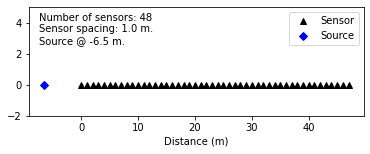

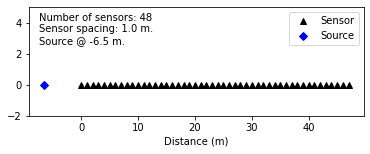

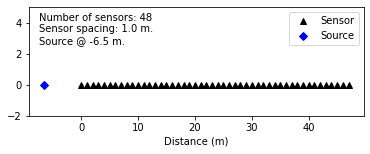

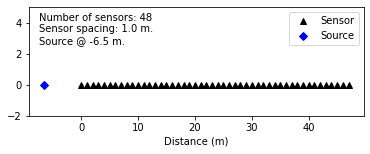

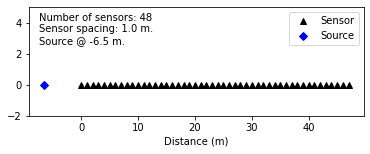

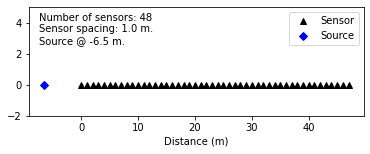

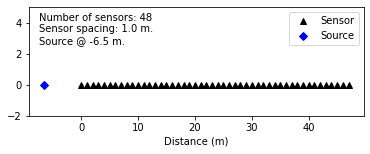

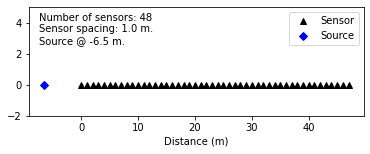

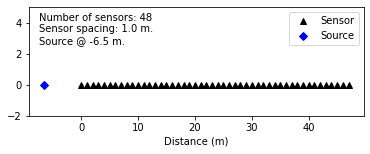

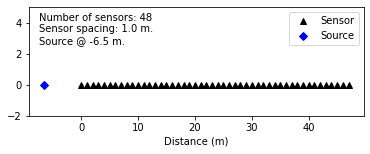

In [3]:
for n, file in enumerate(Files_you_want_to_change_the_source):
    arr = swprocess.Array1D.from_files(Files_you_want_to_change_the_source[n])
    arr.plot()

# Processing

In [4]:
if Replace_existing_files == False:
    if not os.path.exists("Corrected_files"):
        os.makedirs("Corrected_files")

#reading the files to be edited
arrays=[]
for n, file in enumerate (Files_you_want_to_change_the_source):
    array1 = swprocess.Array1D.from_files(file)
    arrays.append(array1)


#save files with the corrected shot locations
for n, array in enumerate (arrays):
    stream = obspy.Stream()
    array.source._x=Correct_shot_location

    rint = lambda x: int(round(x))

    for sensor in array.sensors:
        trace = obspy.Trace(np.array(sensor.amplitude, dtype=np.float32))
        trace.stats.delta = sensor.dt
        trace.stats.starttime = obspy.UTCDateTime(2020, 12, 18, 10, 0, 0)

        if not hasattr(trace.stats, 'su'):
            trace.stats.su = {}
        trace.stats.su.trace_header = obspy.io.segy.segy.SEGYTraceHeader()
        trace.stats.su.trace_header.scalar_to_be_applied_to_all_coordinates = -1000
        trace.stats.su.trace_header.source_coordinate_x = rint(array.source._x*1000)
        trace.stats.su.trace_header.source_coordinate_y = rint(array.source._y*1000)
        trace.stats.su.trace_header.number_of_horizontally_stacked_traces_yielding_this_trace = rint(sensor.nstacks-1)
        trace.stats.su.trace_header.delay_recording_time = rint(sensor.delay*1000)
        trace.stats.su.trace_header.group_coordinate_x = rint(sensor.x*1000)
        trace.stats.su.trace_header.group_coordinate_y = rint(sensor.y*1000)
        trace.stats.su.trace_header.coordinate_units = 1

        stream.append(trace)
    
    fname=f"{Files_you_want_to_change_the_source[n]}"
    if Replace_existing_files == False:
        fname=f"Corrected_files/{Files_you_want_to_change_the_source[n]}"
    stream.write(filename=fname, format="SU")


#### Plot new (corrected) files

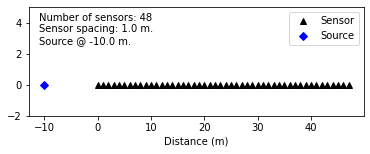

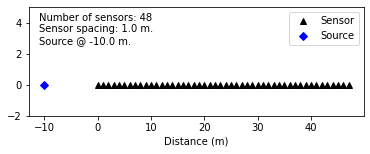

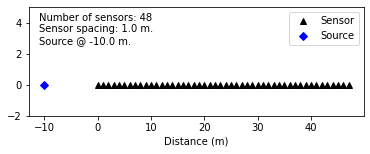

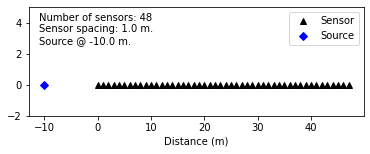

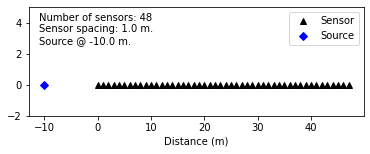

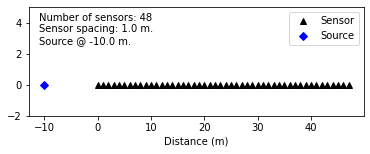

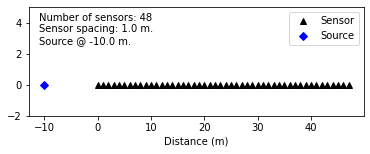

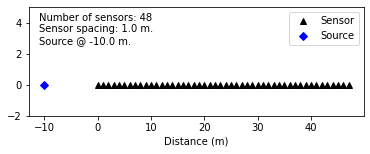

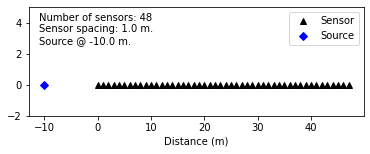

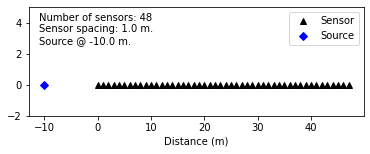

In [5]:
for n, file in enumerate(Files_you_want_to_change_the_source):  
    fname=f"{Files_you_want_to_change_the_source[n]}"
    if Replace_existing_files == False:
        fname=f"Corrected_files/{Files_you_want_to_change_the_source[n]}"
    arr = swprocess.Array1D.from_files(fname)
    arr.plot()